<a href="https://colab.research.google.com/github/ChnssA/Ml-Project-/blob/main/Mtech_Ml_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Indian Men's Attire Recommendation System***



```
# Step 1: Prepare Your Dataset and Encode Features
```



In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Full sample dataset
raw_data = [
    {
        'Occasion': 'Ugadi', 'Region': 'Telugu', 'Attire': 'Pattu Panche + Pattu Shirt/Kurta',
        'Cultural': 'Pattu (silk) is auspicious for the Telugu New Year...',
        'Practical': 'Festive and traditional, suitable for family gatherings...'
    },
    {
        'Occasion': 'Ugadi', 'Region': 'Telugu', 'Attire': 'Pattu Panche + Pattu Shirt/Kurta',
        'Cultural': 'Pattu and bright colors mean prosperity on festival.',
        'Practical': 'Soft silk is comfortable for long ceremonies.'
    },
    {
        'Occasion': 'Office', 'Region': 'Pan-India', 'Attire': 'Formal Trousers + Formal Shirt',
        'Cultural': 'Standard Western business attire, adopted as the...',
        'Practical': 'Presents a clean, professional, and authoritative image...'
    },
    {
        'Occasion': 'Office', 'Region': 'Pan-India', 'Attire': 'Formal Trousers + Formal Shirt',
        'Cultural': 'Formal attire reflects Indian office protocol.',
        'Practical': 'Trousers & shirt are practical for all-day wear.'
    },
    {
        'Occasion': 'Onam', 'Region': 'Kerala', 'Attire': 'Mundu + Melmundu',
        'Cultural': 'Traditional Kerala attire, often white or off-white...',
        'Practical': "Light and airy cotton, perfect for Kerala's humid climate..."
    },
    {
        'Occasion': 'Onam', 'Region': 'Kerala', 'Attire': 'Mundu + Melmundu',
        'Cultural': 'Symbolizes purity and simplicity for Onam.',
        'Practical': 'Cool cotton helps avoid discomfort in humidity.'
    },
    {
        'Occasion': 'Home Leisure', 'Region': 'Pan-India', 'Attire': 'Lungi or Pajama + T-Shirt or Vest',
        'Cultural': 'The Lungi is a traditional and highly common form of...',
        'Practical': 'Unmatched comfort and ventilation, especially in hot...'
    },
    {
        'Occasion': 'Home Leisure', 'Region': 'Pan-India', 'Attire': 'Lungi or Pajama + T-Shirt or Vest',
        'Cultural': 'Everyday comfort wear for men at home.',
        'Practical': 'Allows easy movement, good for relaxing.'
    }
]
df = pd.DataFrame(raw_data)

# Label encoding for each feature and target
feature_cols = ['Occasion', 'Region']
label_col = 'Attire'
le_dict = {}
for col in feature_cols + [label_col]:
    le = LabelEncoder()
    df[col + '_enc'] = le.fit_transform(df[col])
    le_dict[col] = le

# Feature matrix X and target y
X = df[[col + '_enc' for col in feature_cols]]
y = df[label_col + '_enc']




```
# Step 2: Train-Test Split and Train Decision Tree
```



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Stratified split ensures all attire classes appear in train/test
test_size = 0.5
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=test_size, random_state=42, stratify=y)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)



```
# Step 3: Compute and Display Validation Metrics
```



Validation Accuracy: 100.00%
                                   precision    recall  f1-score   support

   Formal Trousers + Formal Shirt       1.00      1.00      1.00         1
Lungi or Pajama + T-Shirt or Vest       1.00      1.00      1.00         1
                 Mundu + Melmundu       1.00      1.00      1.00         1
 Pattu Panche + Pattu Shirt/Kurta       1.00      1.00      1.00         1

                         accuracy                           1.00         4
                        macro avg       1.00      1.00      1.00         4
                     weighted avg       1.00      1.00      1.00         4



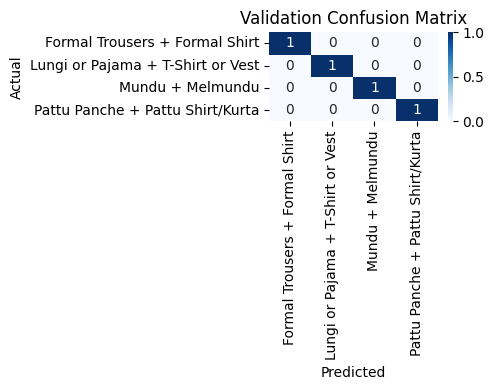

In [3]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

labels = list(range(len(le_dict[label_col].classes_)))
y_pred = clf.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {acc*100:.2f}%')
print(classification_report(y_val, y_pred, labels=labels, target_names=le_dict[label_col].classes_))

cm = confusion_matrix(y_val, y_pred, labels=labels)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, xticklabels=le_dict[label_col].classes_, yticklabels=le_dict[label_col].classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.tight_layout()
plt.show()




```
# Step 4: Interactive Attire Query with Snippets
```



In [5]:
def predict_attire():
    print('\n--- Attire Recommendation ---')
    print('Occasion options:', list(le_dict['Occasion'].classes_))
    print('Region options:', list(le_dict['Region'].classes_))
    occ = input('Enter Occasion: ')
    reg = input('Enter Region: ')
    try:
        occ_enc = le_dict['Occasion'].transform([occ])[0]
        reg_enc = le_dict['Region'].transform([reg])[0]
    except ValueError:
        print('Invalid input. Please use the provided options.')
        return
    X_single = [[occ_enc, reg_enc]]
    pred_class = clf.predict(X_single)[0]
    attire = le_dict['Attire'].inverse_transform([pred_class])[0]
    # Select matching snippet
    row = df[(df['Occasion'] == occ) & (df['Region'] == reg)]
    if not row.empty:
        cultural = row.iloc[0]['Cultural']
        practical = row.iloc[0]['Practical']
    else:
        cultural = 'No cultural snippet available.'
        practical = 'No practical snippet available.'
    print('\nPredicted Attire Class:', attire)
    print('Cultural Reasoning:', cultural)
    print('Practical Reasoning:', practical)

predict_attire()




--- Attire Recommendation ---
Occasion options: ['Home Leisure', 'Office', 'Onam', 'Ugadi']
Region options: ['Kerala', 'Pan-India', 'Telugu']
Enter Occasion: Onam
Enter Region: Telugu

Predicted Attire Class: Pattu Panche + Pattu Shirt/Kurta
Cultural Reasoning: No cultural snippet available.
Practical Reasoning: No practical snippet available.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
